In [1]:
#М = злокачественное, В = доброкачественное

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

In [3]:
sns.set_style("whitegrid")

# Часть 1. EDA

In [4]:
data = pd.read_csv('data.csv')

In [5]:
data.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   
5  ...          23.75           103.40       741.6            0.1791   
6  ...          27.66           153.20      1606.0            0.1442   
7  ...          28.14           110.60       897.0            0.1654   
8  ...          30.73           106.20       739.3            0.1703   
9  ...          40.68            97.65       711.4            0.1853   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   
5             0.5249           0.5355                0.1741          0.3985   
6             0.2576           0.3784                0.1932          0.3063   
7             0.3682           0.2678                0.1556          0.3196   
8             0.5401           0.5390                0.2060          0.4378   
9             1.0580           1.1050                0.2210          0.4366   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  
5                  0.12440          NaN  
6                  0.08368          NaN  
7                  0.11510          NaN  
8                  0.10720          NaN  
9                  0.20750          NaN  

[10 rows x 33 columns]

### Посмотрите на базовые статистики датасета: средние, медианы, и т.д.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [8]:
np.round(data.isna().sum()[data.isna().sum()>0] / data.shape[0], 2)

Unnamed: 32    1.0
dtype: float64

In [9]:
del data['Unnamed: 32'] # удаляем непонятный пустой столбец

In [10]:
del data['id'] # удаляем id

### Постройте гистограммы/распределения признаков, при этом используйте целевую переменную, чтобы сгруппировать и раскрасить гистограммы

In [11]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

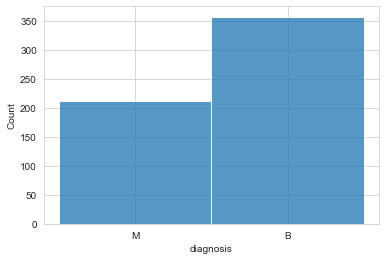

In [12]:
# Распределение целевой переменной diagnosis
sns.histplot(data, x="diagnosis", );

In [13]:
# процентное соотношение
data['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

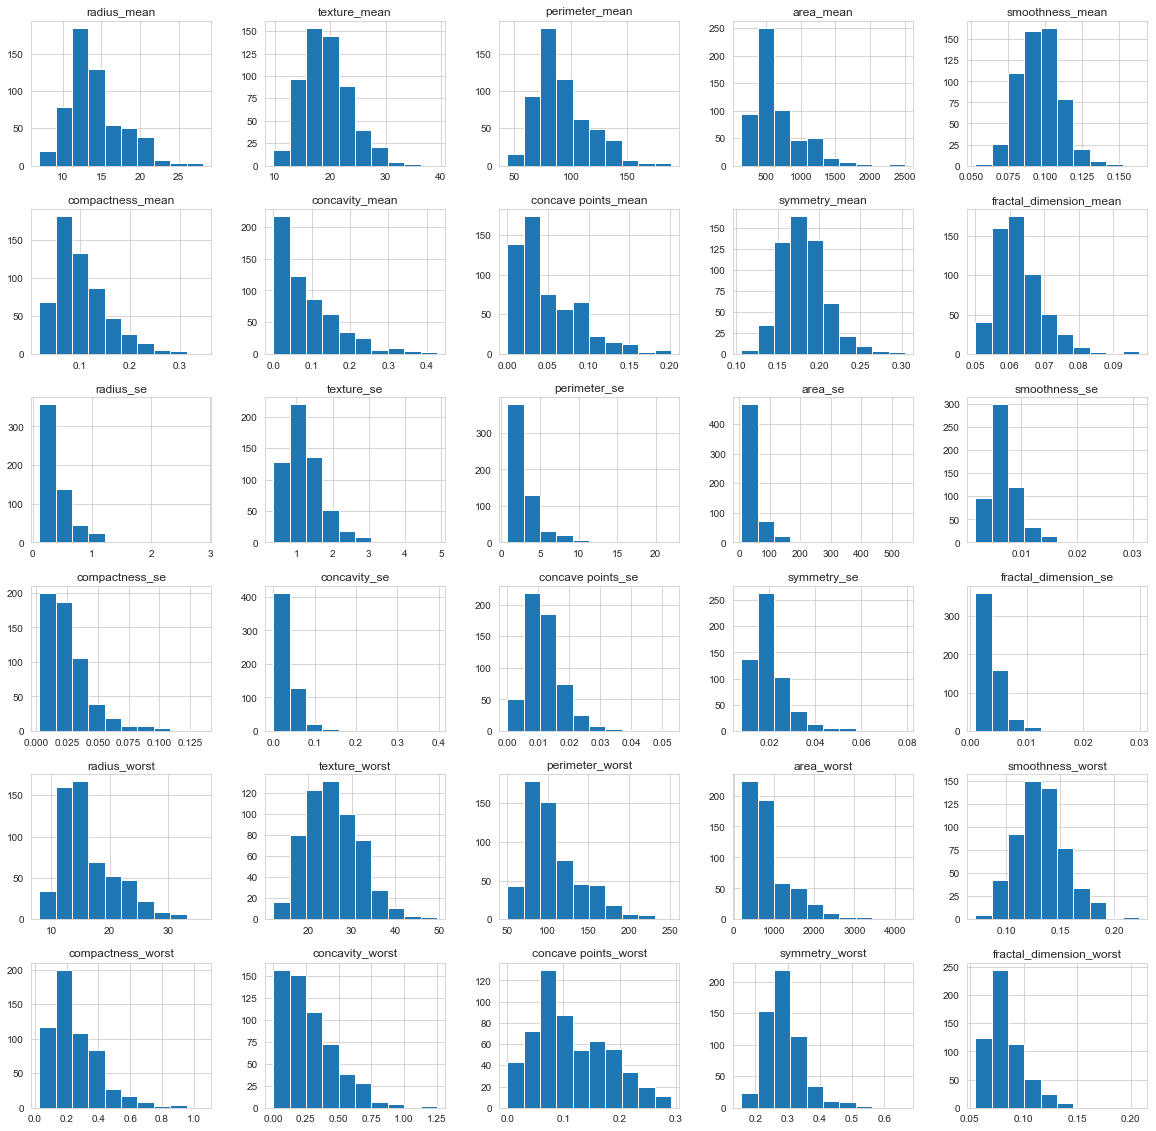

In [14]:
data.hist(figsize = (20, 20));

In [15]:
columns = list(data.columns)
columns.remove('diagnosis')
len(columns)

30

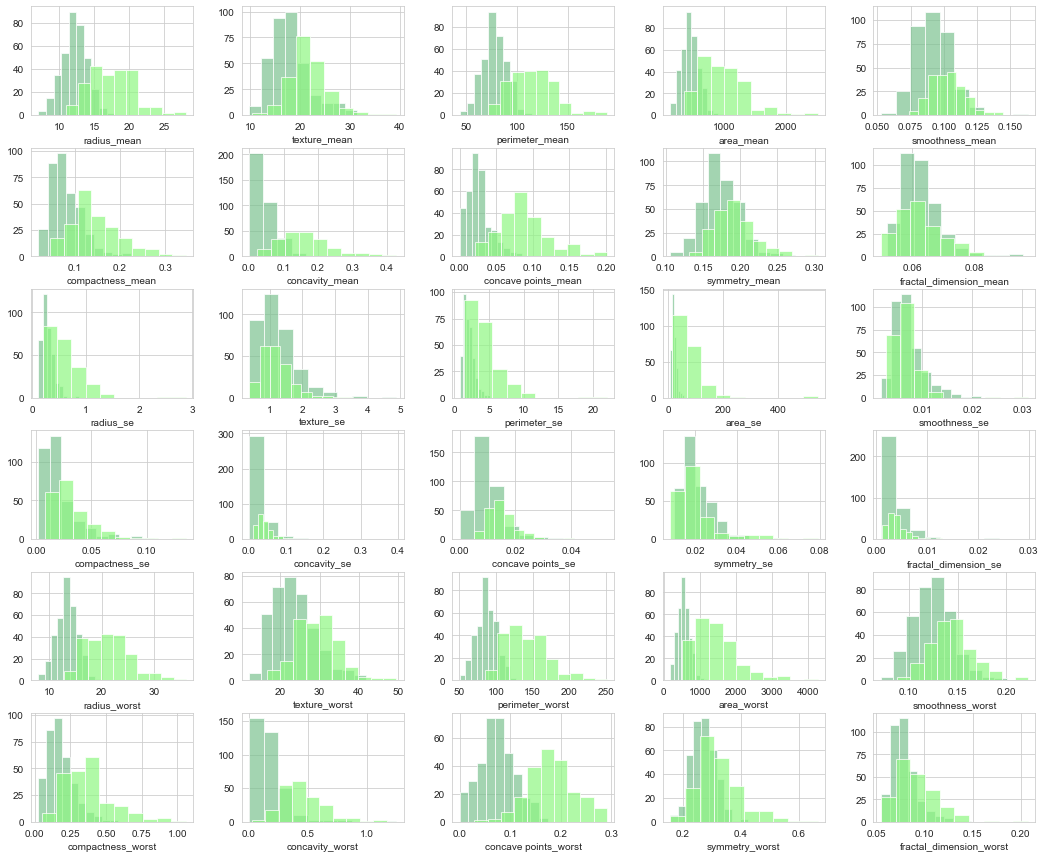

In [16]:
fig, axes = plt.subplots(nrows = 6, ncols = 5, figsize = (18, 15))

for idx, feat in enumerate(columns):
    axes[idx // 5, idx % 5].hist(data[data['diagnosis'] == 'B'][feat], color='#7CC290', alpha=0.7)
    axes[idx // 5, idx % 5].hist(data[data['diagnosis'] == 'M'][feat], color='#8FF782', alpha=0.7)
    axes[idx // 5, idx % 5].set_xlabel(feat)
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

In [17]:
data.corr()

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

### Постройте heatmap для матрицы корреляций, есть ли признаки, которые сильно скоррелированы? Какие это признаки?

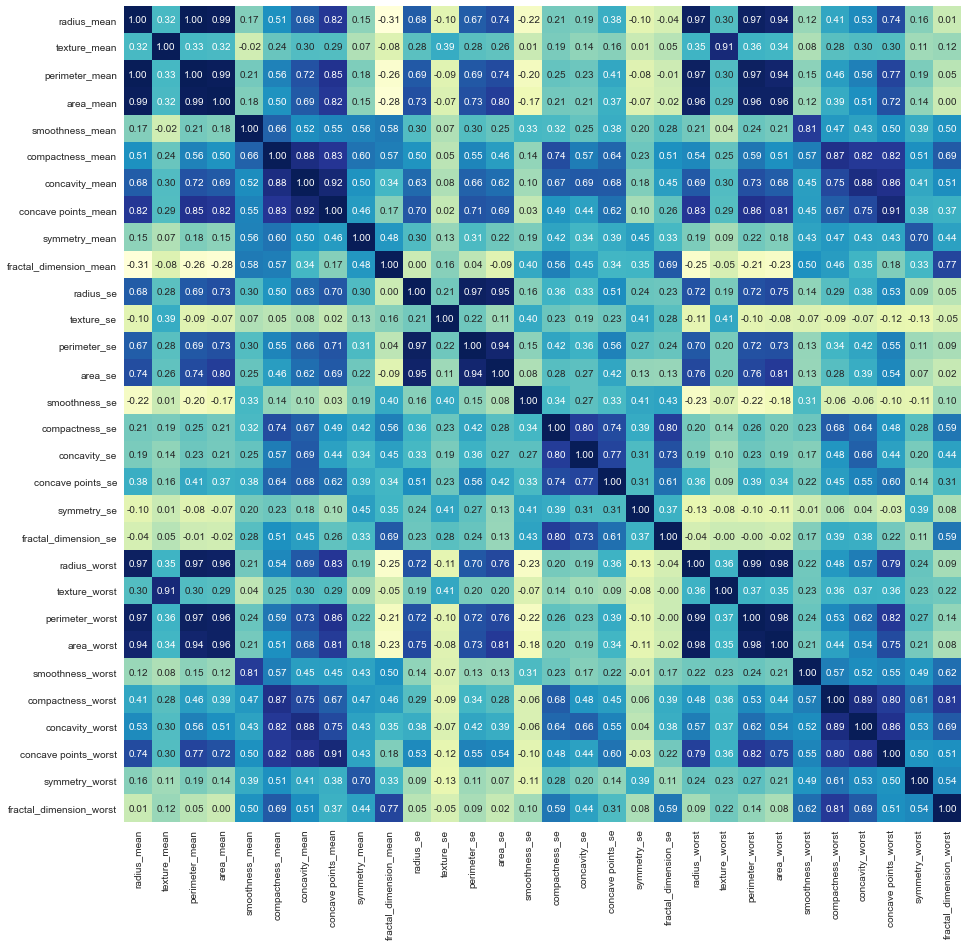

In [18]:
#correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, cbar=False, fmt= '.2f')
plt.show()

In [19]:
# Находим скоррелированные признаки
sorted_mat = data.corr().unstack().sort_values(ascending=False)
corr_df = sorted_mat[(sorted_mat < 1) & (sorted_mat > 0.85)].reset_index()
most_corr_features = corr_df['level_0'].drop_duplicates().to_list()
most_corr_features.append('diagnosis')

### Постройте для сильно скоррелированных признаков попарные scatterplot-ы, действительно ли наблюдается линейная зависимость?

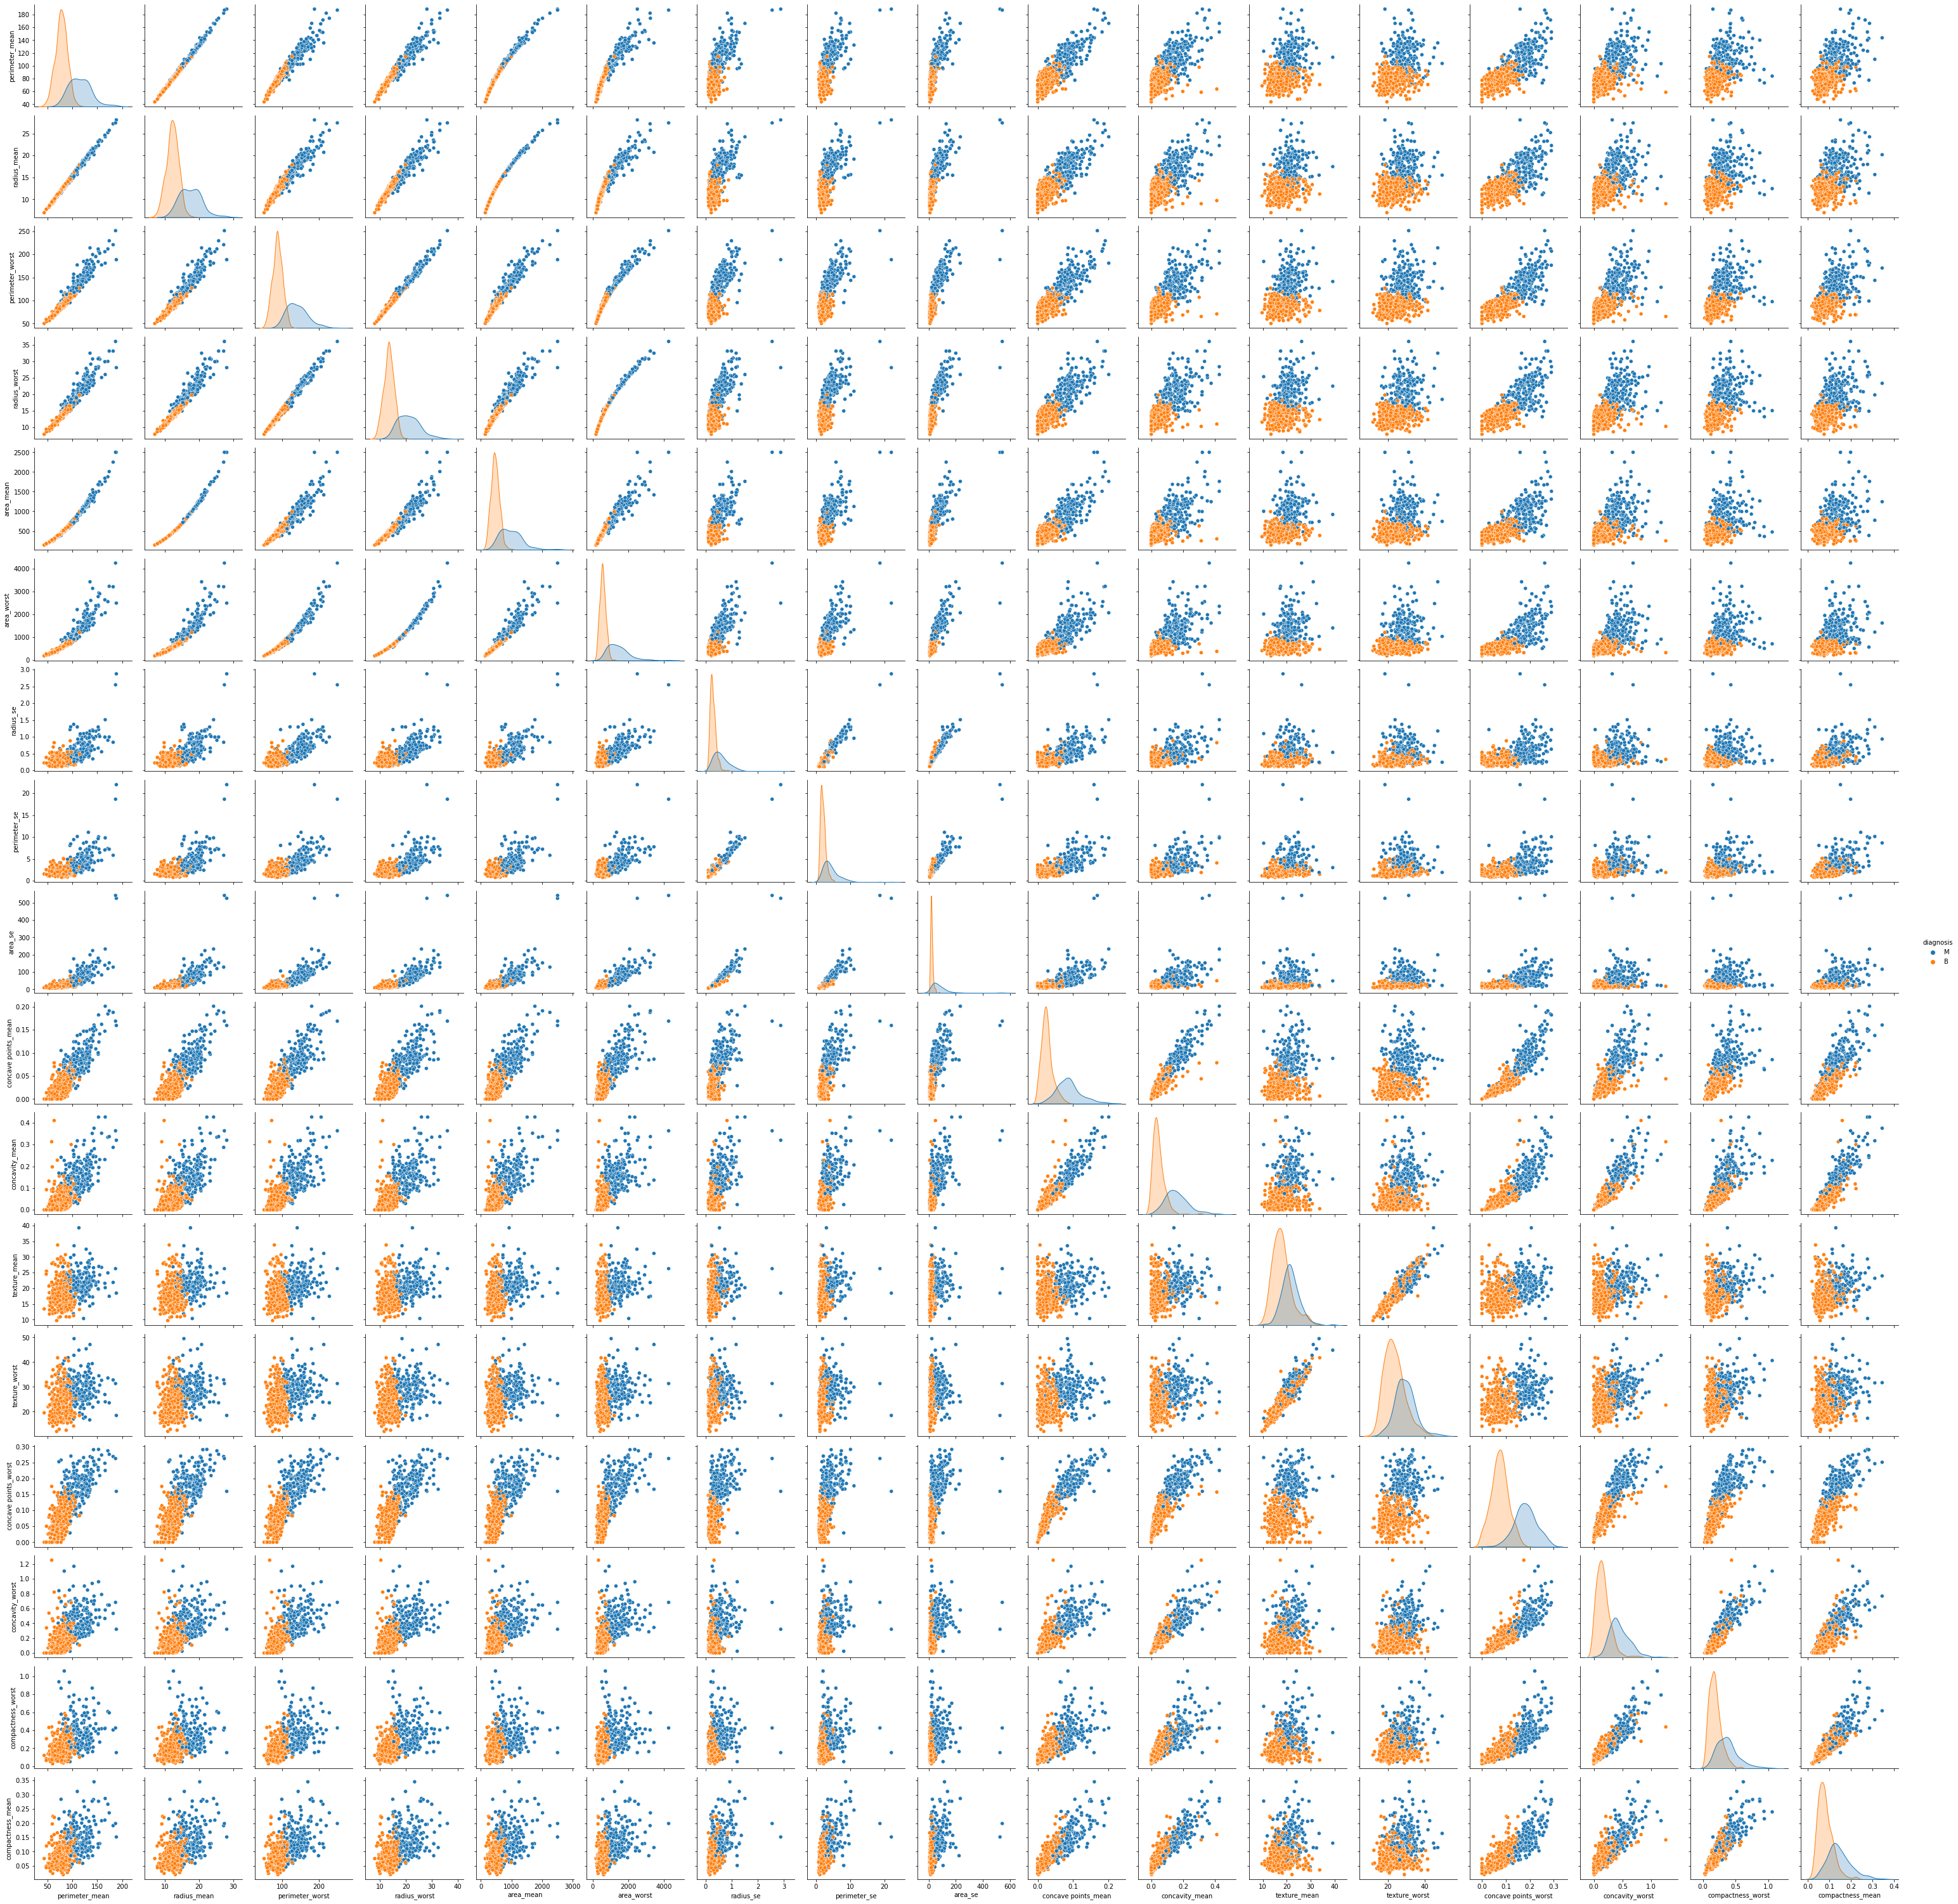

In [38]:
sns.pairplot(data[most_corr_features], hue='diagnosis');

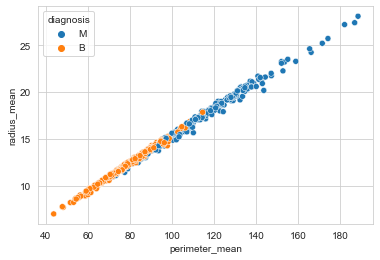

In [20]:
sns.scatterplot(x="perimeter_mean", y="radius_mean", data=data, hue='diagnosis');

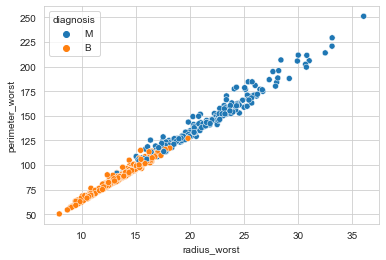

In [21]:
sns.scatterplot(x="radius_worst", y="perimeter_worst", data=data, hue='diagnosis');

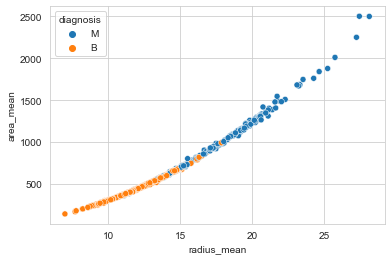

In [22]:
sns.scatterplot(x="radius_mean", y="area_mean", data=data, hue='diagnosis');

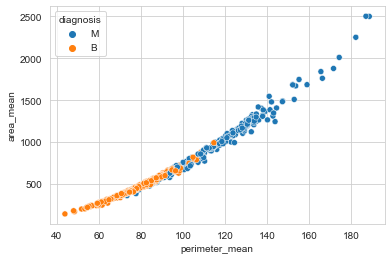

In [23]:
sns.scatterplot(x="perimeter_mean", y="area_mean", data=data, hue='diagnosis');

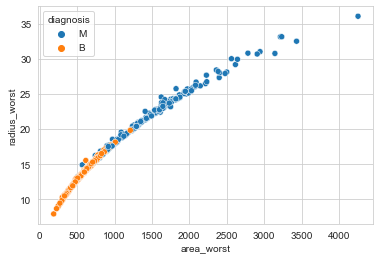

In [24]:
sns.scatterplot(x="area_worst", y="radius_worst", data=data, hue='diagnosis');

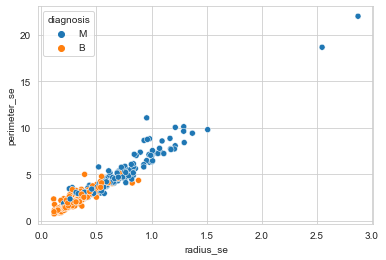

In [25]:
sns.scatterplot(x="radius_se", y="perimeter_se", data=data, hue='diagnosis');

Видим, что действительно наблюдается линейная зависимость. 

### Используя boxplots и группировку по целевой переменной, попробуйте предположить, по каким признакам наиболее удобно было бы отделить злокачественные новообразования от доброкачественных

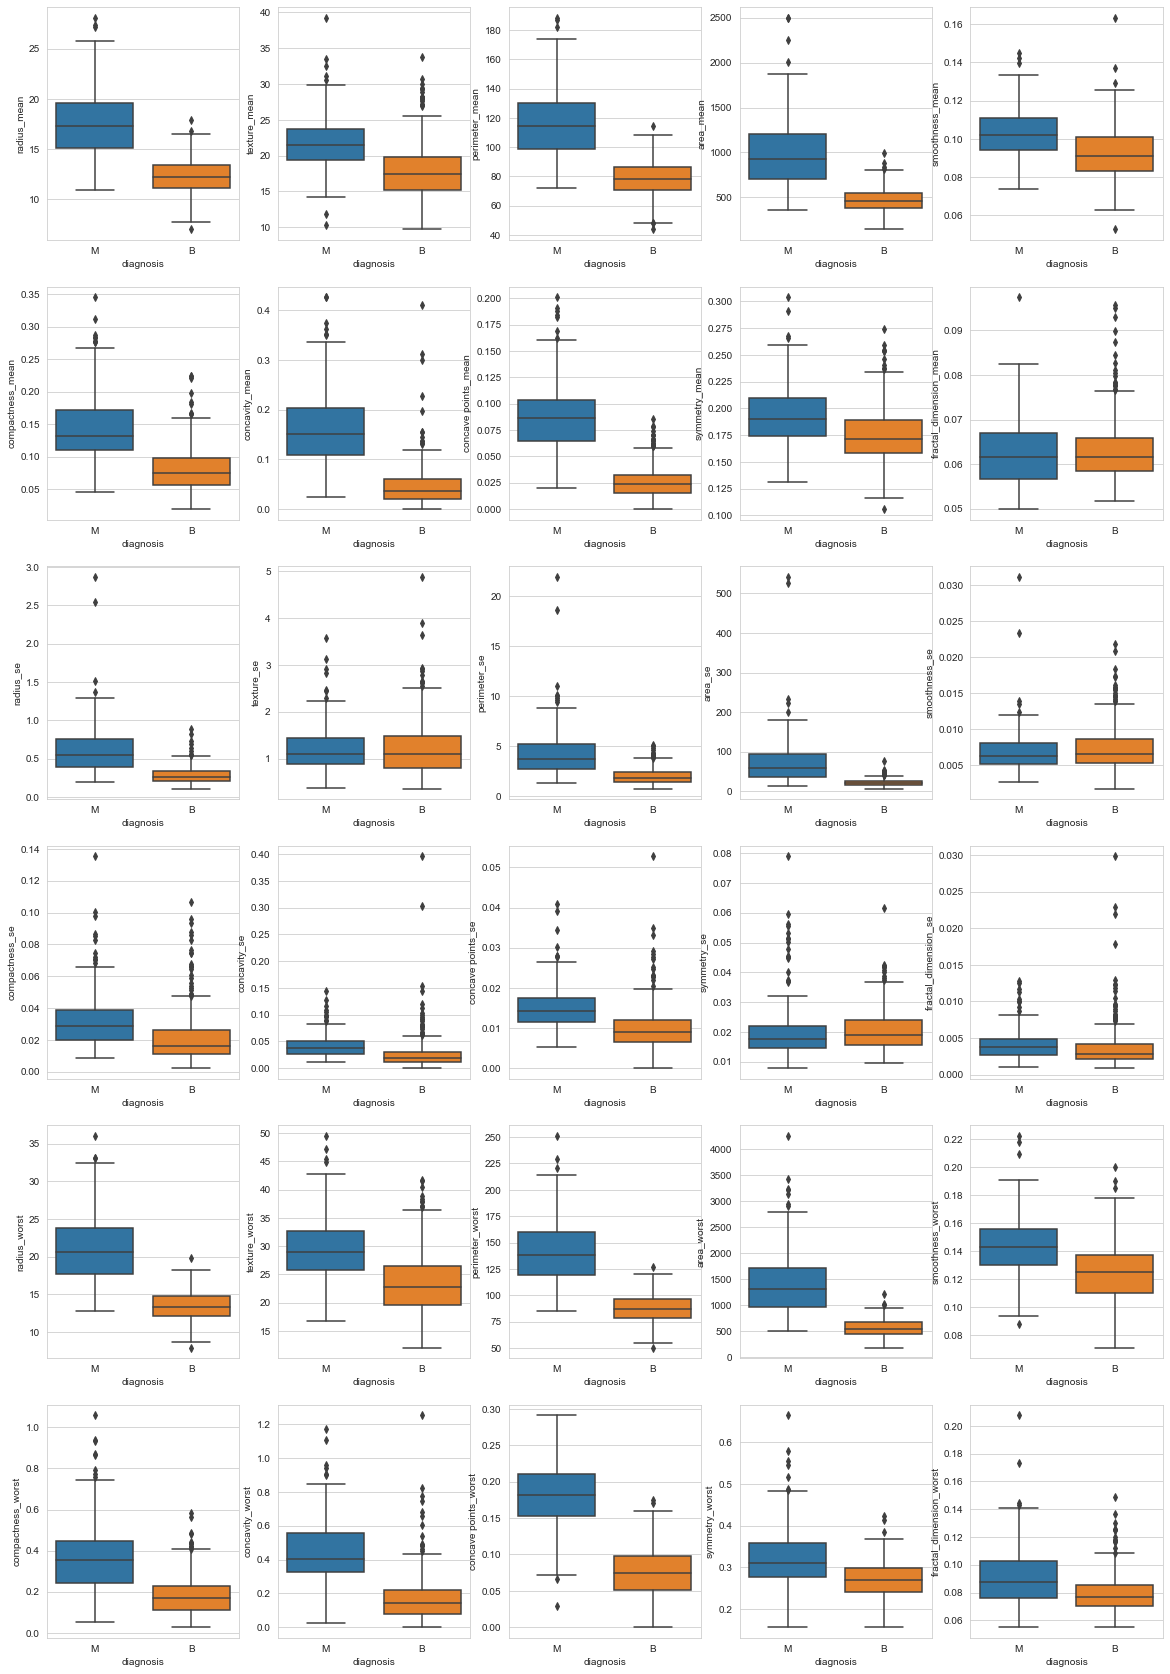

In [26]:
fig, axes = plt.subplots(6, 5, figsize=(20, 30))

sns.boxplot(ax=axes[0, 0], data=data, x='diagnosis', y='radius_mean')
sns.boxplot(ax=axes[0, 1], data=data, x='diagnosis', y='texture_mean')
sns.boxplot(ax=axes[0, 2], data=data, x='diagnosis', y='perimeter_mean')
sns.boxplot(ax=axes[0, 3], data=data, x='diagnosis', y='area_mean')
sns.boxplot(ax=axes[0, 4], data=data, x='diagnosis', y='smoothness_mean')

sns.boxplot(ax=axes[1, 0], data=data, x='diagnosis', y='compactness_mean')
sns.boxplot(ax=axes[1, 1], data=data, x='diagnosis', y='concavity_mean')
sns.boxplot(ax=axes[1, 2], data=data, x='diagnosis', y='concave points_mean')
sns.boxplot(ax=axes[1, 3], data=data, x='diagnosis', y='symmetry_mean')
sns.boxplot(ax=axes[1, 4], data=data, x='diagnosis', y='fractal_dimension_mean')

sns.boxplot(ax=axes[2, 0], data=data, x='diagnosis', y='radius_se')
sns.boxplot(ax=axes[2, 1], data=data, x='diagnosis', y='texture_se')
sns.boxplot(ax=axes[2, 2], data=data, x='diagnosis', y='perimeter_se')
sns.boxplot(ax=axes[2, 3], data=data, x='diagnosis', y='area_se')
sns.boxplot(ax=axes[2, 4], data=data, x='diagnosis', y='smoothness_se')

sns.boxplot(ax=axes[3, 0], data=data, x='diagnosis', y='compactness_se')
sns.boxplot(ax=axes[3, 1], data=data, x='diagnosis', y='concavity_se')
sns.boxplot(ax=axes[3, 2], data=data, x='diagnosis', y='concave points_se')
sns.boxplot(ax=axes[3, 3], data=data, x='diagnosis', y='symmetry_se')
sns.boxplot(ax=axes[3, 4], data=data, x='diagnosis', y='fractal_dimension_se')

sns.boxplot(ax=axes[4, 0], data=data, x='diagnosis', y='radius_worst')
sns.boxplot(ax=axes[4, 1], data=data, x='diagnosis', y='texture_worst')
sns.boxplot(ax=axes[4, 2], data=data, x='diagnosis', y='perimeter_worst')
sns.boxplot(ax=axes[4, 3], data=data, x='diagnosis', y='area_worst')
sns.boxplot(ax=axes[4, 4], data=data, x='diagnosis', y='smoothness_worst')

sns.boxplot(ax=axes[5, 0], data=data, x='diagnosis', y='compactness_worst')
sns.boxplot(ax=axes[5, 1], data=data, x='diagnosis', y='concavity_worst')
sns.boxplot(ax=axes[5, 2], data=data, x='diagnosis', y='concave points_worst')
sns.boxplot(ax=axes[5, 3], data=data, x='diagnosis', y='symmetry_worst')
sns.boxplot(ax=axes[5, 4], data=data, x='diagnosis', y='fractal_dimension_worst');


Наиболее репрезентативные признаки: <br> - concave points_mean <br> - concave points_worst <br> - perimeter_worst  <br> - concavity_mean  <br> - radius_worst  <br> - area_worst

#  Часть 2. Моделирование при помощи kNN

### Разбейте данные на train-test, отложив 30% выборки для тестирования

In [27]:
# перекодируем целевую переменную
data['diagnosis'] = data['diagnosis'].apply(lambda x: 1 if x=='M' else 0)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['diagnosis'], axis=1), data['diagnosis'], test_size=0.30, random_state=42, stratify=data['diagnosis']
)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

Смотрим, что соотношение ответов одинаковое и в обучающих данных и в тестовых

In [30]:
y_train.value_counts(normalize=True) 

0    0.628141
1    0.371859
Name: diagnosis, dtype: float64

In [31]:
y_test.value_counts(normalize=True)

0    0.625731
1    0.374269
Name: diagnosis, dtype: float64

### Приведите все непрерывные переменные к одному масштабу при помощи стандартизации. Кратко поясните, почему стандартизация здесь нужна 

Стандартизация нужна для приведения данных к одной размерности. Используем Z-масштабирование

In [32]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Постройте модель kNN "из коробки" без настройки параметров

In [34]:
knn = KNeighborsClassifier() #default neighbors = 5 
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

### Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней

In [35]:
def quality_report(prediction, actual):
    print((f" Accuracy: {accuracy_score(prediction, actual):.3f}\n \
Precision: {precision_score(prediction, actual):.3f}\n \
Recall: {recall_score(prediction, actual):.3f}\n \
f1_score: {f1_score(prediction, actual):.3f}"))

In [36]:
# Train quality
quality_report(knn.predict(X_train_scaled), y_train)

 Accuracy: 0.972
 Precision: 0.932
 Recall: 0.993
 f1_score: 0.962


In [37]:
# Test quality
quality_report(knn.predict(X_test_scaled), y_test)

 Accuracy: 0.965
 Precision: 0.906
 Recall: 1.000
 f1_score: 0.951


In [38]:
# построим ROC-кривую
def plot_roc_curve(y_test, y_pred):
    fper, tper, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fper, tper)
    plt.plot(fper, tper, color='green', label=f'ROC-кривая (area = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC AUC (area = {roc_auc:.3f})')
    plt.legend(loc="lower right")
    plt.show()

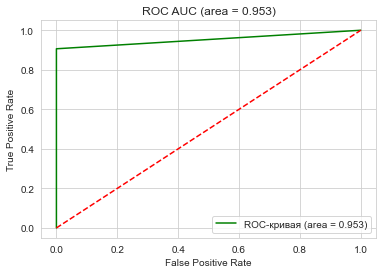

In [39]:
# fper, tper, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

### Теперь проведите настройку параметра числа соседей на кросс-валидации. Снова оцените результаты, стало ли лучше? :) 

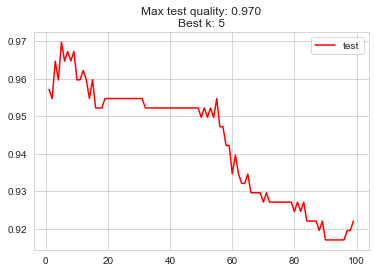

In [40]:
### кроссвалидация на accuracy

from sklearn.model_selection import cross_val_score

neighbors = range(1, 100)
accuracy_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    accuracy_test.append(scores.mean())
    
plt.plot(neighbors, accuracy_test, color='red', label='test')
plt.title(f'Max test quality: {max(accuracy_test):.3f}\nBest k: {np.argmax(accuracy_test)+1}')
plt.legend()
plt.show()

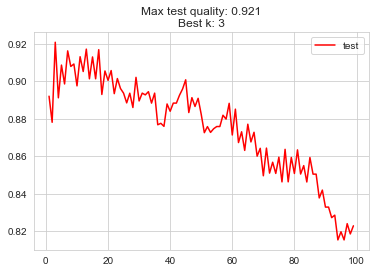

In [56]:
### кроссвалидация на f1

neighbors = range(1, 100)
f1_test = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='f1')
    f1_test.append(scores.mean())
    
plt.plot(neighbors, f1_test, color='red', label='test')
plt.title(f'Max test quality: {max(f1_test):.3f}\nBest k: {np.argmax(f1_test)+1}')
plt.legend()
plt.show()

На кроссвалидации лучший Accuracy при k = 5. Именно с этим параметром по умолчанию мы обучили модель выше. Accuracy на трейне составила 0.972, а на тесте получилась чуть ниже - 0.965.

### Как вы помните, логистическая регрессия плохо относится к линейно-зависимым признакам, уберите переменные, корреляция пирсона между которыми превышает 0.85

In [41]:
sorted_mat = data.corr().unstack().sort_values(ascending=False)

In [42]:
# получаем список полей с корреляцией > 0.85
cols = sorted_mat[(sorted_mat < 1) & (sorted_mat > 0.85)].drop_duplicates().reset_index()['level_0'].to_list()

In [43]:
data_2 = data.drop(cols, axis=1) 

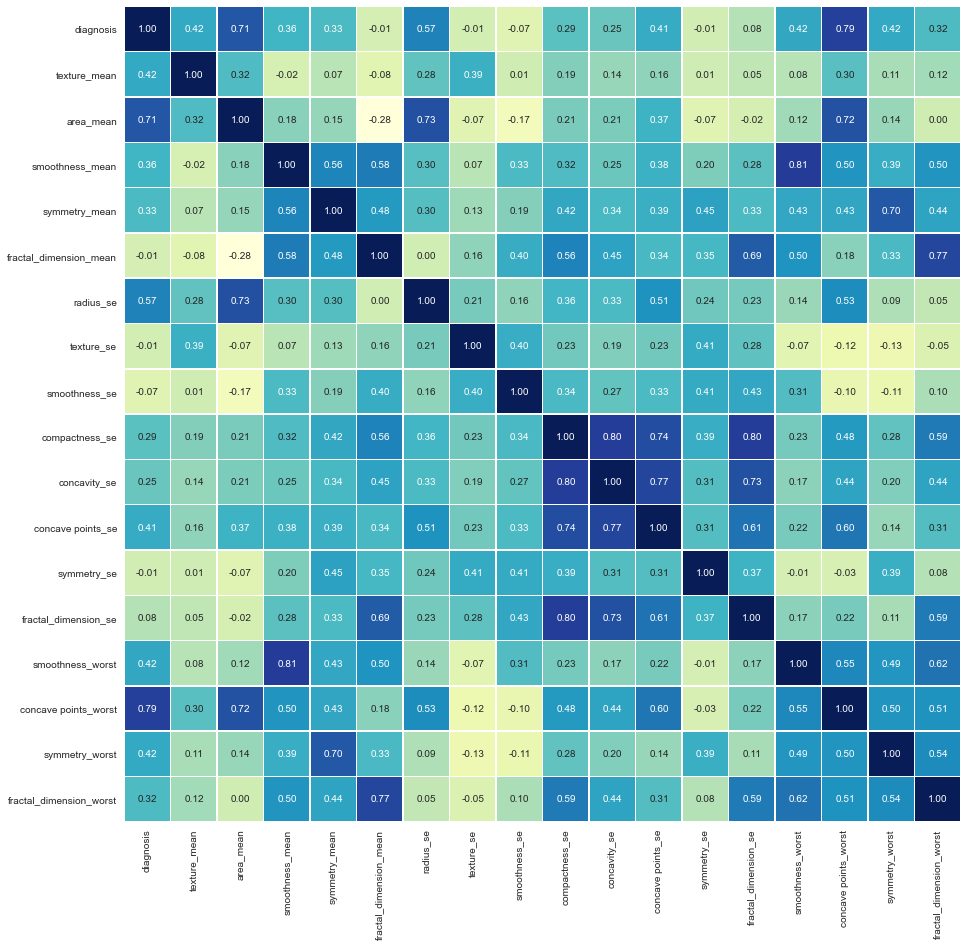

In [44]:
# снова построим correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(data_2.corr(), cmap="YlGnBu", annot=True, cbar=False, linewidths=.5, fmt= '.2f')
plt.show()

### Постройте модель логистической регрессии "из коробки" без настройки параметров

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    data_2.drop(['diagnosis'], axis=1), data_2['diagnosis'], test_size=0.30, random_state=42, stratify=data_2['diagnosis']
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 17), (171, 17), (398,), (171,))

In [46]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'lbfgs')
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

### Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней.

In [49]:
print("Train quality:")
quality_report(log_reg.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg.predict(X_test_scaled), y_test)

Train quality:
 Accuracy: 0.982
 Precision: 0.959
 Recall: 0.993
 f1_score: 0.976

Test quality:
 Accuracy: 0.977
 Precision: 0.938
 Recall: 1.000
 f1_score: 0.968


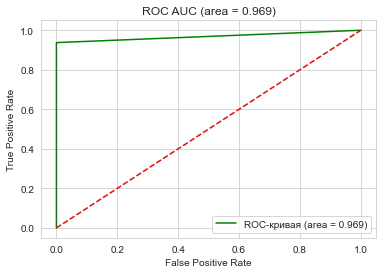

In [50]:
y_pred = log_reg.predict(X_test_scaled)
plot_roc_curve(y_test, y_pred)

### Визуализируйте влияние коэффициентов на целевую переменную

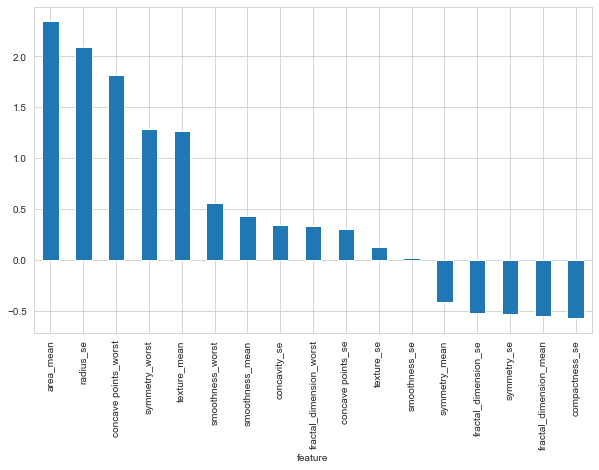

In [51]:
featureImportance = pd.DataFrame({"feature":data_2.drop(columns='diagnosis').columns.values ,
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot(kind='bar', figsize=(10, 6));

### Теперь проведите настройку параметра регуляризации C на кросс-валидации (LogisticRegressionCV)

In [52]:
from sklearn.linear_model import LogisticRegressionCV

log_reg2 = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=5000,Cs=100)
log_reg2.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=100, cv=5, max_iter=5000)

In [53]:
print("Train quality:")
quality_report(log_reg2.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg2.predict(X_test_scaled), y_test)

Train quality:
 Accuracy: 0.980
 Precision: 0.953
 Recall: 0.993
 f1_score: 0.972

Test quality:
 Accuracy: 0.959
 Precision: 0.891
 Recall: 1.000
 f1_score: 0.942


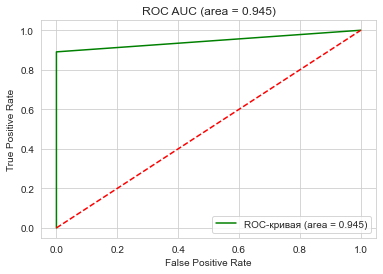

In [54]:
y_pred = log_reg2.predict(X_test_scaled)
plot_roc_curve(y_test, y_pred)